In [71]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\ravi\anaconda3\lib\site-packages (0.0)


In [72]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [73]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [74]:
df = pd.read_csv("Resources/MSFT.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,51.480000,51.680000,50.060001,50.560001,46.137611,43564500
1,2016-01-20,49.980000,51.380001,49.099998,50.790001,46.347496,63273000
2,2016-01-21,51.000000,51.580002,50.299999,50.480000,46.064606,40191200
3,2016-01-22,51.410000,52.330002,51.259998,52.290001,47.716290,37555800
4,2016-01-25,51.939999,52.650002,51.650002,51.790001,47.260017,34707700


In [75]:
#df = pd.get_dummies(df)
#df.head()
#df = df.drop('Date', axis=0)
df = df.drop(columns=['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,51.480000,51.680000,50.060001,50.560001,46.137611,43564500
1,49.980000,51.380001,49.099998,50.790001,46.347496,63273000
2,51.000000,51.580002,50.299999,50.480000,46.064606,40191200
3,51.410000,52.330002,51.259998,52.290001,47.716290,37555800
4,51.939999,52.650002,51.650002,51.790001,47.260017,34707700


# Select your features (columns)

In [140]:

y = df["Open"].values.reshape(-1, 1)
diff = df['Close']-df["Open"]
diff_locations = []
for i in diff:
    if (i <0):
        diff_locations.append(0)
    else:
        diff_locations.append(1)
df['diff'] = pd.DataFrame(diff_locations)
#X = df[['High', 'Low', 'Close', 'Volume','diff']]
X = df[['High', 'Low', 'Close', 'Volume']]
print(X.shape, y.shape)

(1259, 5) (1259, 1)


In [141]:
print(diff)

0      -0.919999
1       0.810001
2      -0.520000
3       0.880001
4      -0.149998
          ...   
1254   -0.979996
1255   -1.570007
1256    2.319992
1257   -2.890000
1258   -0.870010
Length: 1259, dtype: float64


In [142]:
print(X)

            High         Low       Close    Volume  diff
0      51.680000   50.060001   50.560001  43564500     0
1      51.380001   49.099998   50.790001  63273000     1
2      51.580002   50.299999   50.480000  40191200     0
3      52.330002   51.259998   52.290001  37555800     1
4      52.650002   51.650002   51.790001  34707700     0
...          ...         ...         ...       ...   ...
1254  218.910004  216.729996  217.490005  23047000     0
1255  217.100006  213.320007  214.929993  23249300     0
1256  216.759995  213.929993  216.339996  20087100     1
1257  217.460007  212.740005  213.020004  29480800     0
1258  214.509995  212.029999  212.649994  31691500     0

[1259 rows x 5 columns]


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [144]:
y_train

array([[ 83.470001],
       [ 78.580002],
       [ 57.650002],
       [109.330002],
       [140.149994],
       [ 60.43    ],
       [ 86.349998],
       [ 64.470001],
       [ 68.68    ],
       [ 68.139999],
       [ 83.5     ],
       [215.100006],
       [105.940002],
       [208.      ],
       [104.879997],
       [114.800003],
       [149.399994],
       [210.949997],
       [ 93.529999],
       [195.789993],
       [208.419998],
       [122.190002],
       [ 93.989998],
       [192.889999],
       [ 68.150002],
       [210.070007],
       [162.610001],
       [139.660004],
       [ 70.110001],
       [ 52.75    ],
       [ 52.41    ],
       [ 62.790001],
       [126.199997],
       [ 56.849998],
       [ 65.599998],
       [142.770004],
       [119.389999],
       [ 69.269997],
       [221.699997],
       [217.259995],
       [ 77.669998],
       [ 51.41    ],
       [ 49.099998],
       [111.669998],
       [183.149994],
       [107.050003],
       [134.880005],
       [173.8

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [145]:
# Scale your data


from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

# Train the Model



In [146]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
#from sklearn.linear_model import LinearRegression
#model2 = LinearRegression()

from sklearn.linear_model import LinearRegression
#model2 = LogisticRegression()
model2 = LinearRegression()
model2.fit(X_train_minmax, y_train_minmax)
#print(f"Training Data Score: {model2.score(X_train_minmax, y_train_minmax)}")


LinearRegression()

In [147]:

print(f"Testing Data Score: {model2.score(X_test_minmax, y_test_minmax)}")

Testing Data Score: 0.9997369224629


In [148]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [149]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

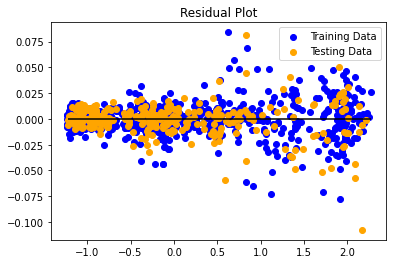

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [152]:

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.00024687359686409964, R2: 0.9997369224629


In [153]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0004798675609063992, R2: 0.9994886355703444


C:\ravi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11431922060396538, tolerance: 0.0944
  model = cd_fast.enet_coordinate_descent(


In [154]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0002486270514688221, R2: 0.9997350539175202


In [155]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.00045784650138941174, R2: 0.9995121020170429


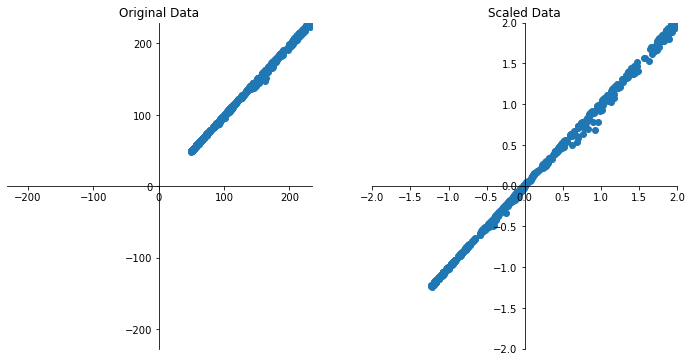

In [156]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["High"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["High"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])